# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


In [27]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(5)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [28]:
df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [29]:
                                                        # LIMPEZA E CONVERSÃO 
                                    # ----------------------------------------------------------------------

# Ajustando Coluna Salário maneira simples.
# df['Income'] = df['Income'].str.replace(r'[.,]', '', regex=True)


# AJUSTANTDO COLUNA EDUCATION
df['Education'] = df['Education'].str.replace("'", '', regex=True)


# LIMPEZA E CONVERSÃO PARA INCOME

# Definindo as colunas
column_income = 'Income'
column_credit_score = 'Credit Score'
                    

# Limpeza
if df[column_income].dtype == 'object':
    df[column_income] = (
        df[column_income]
        .astype(str)
        .str.replace('R$', '', regex=False)    # Remove símbolo de moeda
        .str.replace('$', '', regex=False)     # Remove símbolo de dólar
        .str.replace('.', '', regex=False)     # Remove separador de milhar
        .str.replace(',', '.', regex=False)    # Substitui vírgula por ponto decimal
        .str.strip()
    )

# Conversão para número coluna salário
df[column_income] = pd.to_numeric(df[column_income], errors='coerce')


# Definindo as colunas
column_age = 'Age'
column_credit_score = 'Credit Score'


                                    # ----------------------------------------------------------------------
                                    # 1. CÁLCULO DA MÉDIA DE IDADE POR GRUPO (Credit Score)
                                    # ----------------------------------------------------------------------


# Calcular a média de idade para cada tipo de Credit Score
media_idade_por_score = df.groupby(column_credit_score)[column_age].mean()

print("Média de Idade Calculada para Cada Credit Score:")
print(media_idade_por_score)
print("-" * 60)


# IMPUTAÇÃO DOS VALORES NULOS (Usando .transform())

# O método .transform('mean') calcula a média de 'Age' dentro de cada grupo
# de 'Credit Score' e retorna um Series alinhado ao DataFrame original.
# Isso garante que a média correta seja usada apenas para preencher os NaN
# de cada respectivo grupo.

df[column_age] = df[column_age].fillna(
    df.groupby(column_credit_score)[column_age].transform('mean')
)


# VERIFICAÇÃO FINAL

# Verificação da contagem de valores nulos
nulos_restantes = df[column_age].isnull().sum()

if nulos_restantes == 0:
    print(f"Imputação concluída. Nulos restantes em {column_age}: {nulos_restantes}")
else:
    print(f" Atenção: Nulos restantes em {column_age}: {nulos_restantes}")
    print("Isso pode ocorrer se existiam nulos em 'Age' E 'Credit Score' na mesma linha.")
   
# Se sobrar nulo, a melhor opção é imputar com a média global da coluna:
# df[column_age] = df[column_age].fillna(df[column_age].mean())

# Exibindo o resultado da imputação para algumas linhas (opcional)
print("Amostra dos Dados após Imputação:")
print(df[[column_age, column_credit_score]].sample(10))

df.isnull().sum()/len(df)*100


                                    # ----------------------------------------------------------------------
                                    # 1. VERIFICAÇÃO DE TERMOS E ERROS DE DIGITAÇÃO E PROPORÇÕES
                                    # ----------------------------------------------------------------------

frequencia_genero = (df['Gender'].value_counts()/len(df))*100
print(frequencia_genero)

frequencia_Education = (df['Education'].value_counts()/len(df))*100
print(frequencia_Education)

frequencia_Marital_Status = (df['Marital Status'].value_counts()/len(df))*100
print(frequencia_Marital_Status)
 
frequencia_Home_Ownership = (df['Home Ownership'].value_counts()/len(df))*100
print(frequencia_Home_Ownership)

frequencia_Credit_Score = (df['Credit Score'].value_counts()/len(df))*100
print(frequencia_Credit_Score)




Média de Idade Calculada para Cada Credit Score:
Credit Score
Average    29.258065
High       41.590909
Low        28.090909
Name: Age, dtype: float64
------------------------------------------------------------
Imputação concluída. Nulos restantes em Age: 0
Amostra dos Dados após Imputação:
           Age Credit Score
69   36.000000         High
41   27.000000          Low
70   41.000000         High
72   51.000000         High
125  25.000000      Average
96   40.000000         High
6    26.000000      Average
19   29.258065      Average
101  36.000000         High
155  38.000000         High
Gender
Female    52.439024
Male      47.560976
Name: count, dtype: float64
Education
Bachelors Degree       25.609756
Masters Degree         21.951220
Doctorate              18.902439
High School Diploma    18.292683
Associates Degree      15.243902
Name: count, dtype: float64
Marital Status
Married    53.04878
Single     46.95122
Name: count, dtype: float64
Home Ownership
Owned     67.682927
Ren

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**
**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [30]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.648943,83765.243902,0.652439
std,7.998858,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.000000,57500.000000,0.000000
50%,38.500000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


## Análise Univariada

1. Credit Score (Pontuação de Crédito):
Insight: A base de clientes é majoritariamente de baixo risco, com a maior parte dos registros concentrada no score "High". Os scores "Average" e "Low" representam uma fatia menor, indicando que o foco da análise deve ser na diferenciação dos scores "High" e "Average".

3. Age (Idade)
Insight: A idade tem uma distribuição simétrica e relativamente concentrada (sem outliers visíveis, conforme a caixa), com a maioria dos clientes entre 28 e 45 anos (aproximadamente Q1 e Q3). A mediana está em torno de 36 anos.

4. Home Ownership (Situação da Moradia)
Insight: A maioria dos clientes tem casa própria ("Owned"), superando significativamente aqueles que alugam ("Rented"). Esta é uma característica de estabilidade na base, que se alinha à alta frequência de score "High".

4. Income (Renda/Salário)
Gráfico: Histograma de Densidade com Box Plot.
Insight Curto: A distribuição da Renda é enviesada positivamente (skewed right). A maioria dos clientes tem renda concentrada entre 40k e 100k, mas há uma longa cauda de alta renda se estendendo além de 160k, o que está visível tanto no histograma quanto na extensão do Box Plot superior. Recomendação: O enviesamento e os outliers na cauda superior justificam a normalização da renda para uso em modelos de Machine Learning (o que você já fez com o MinMaxScaler).


Não foram encontrados outiliers.

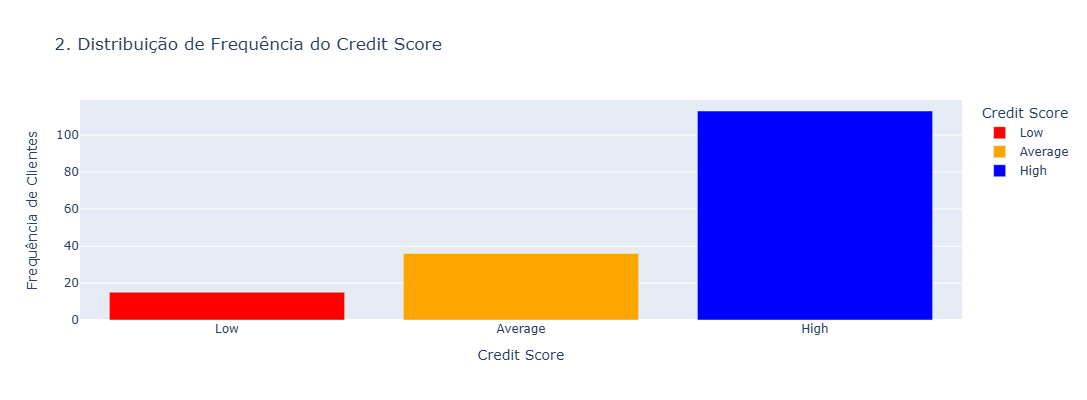

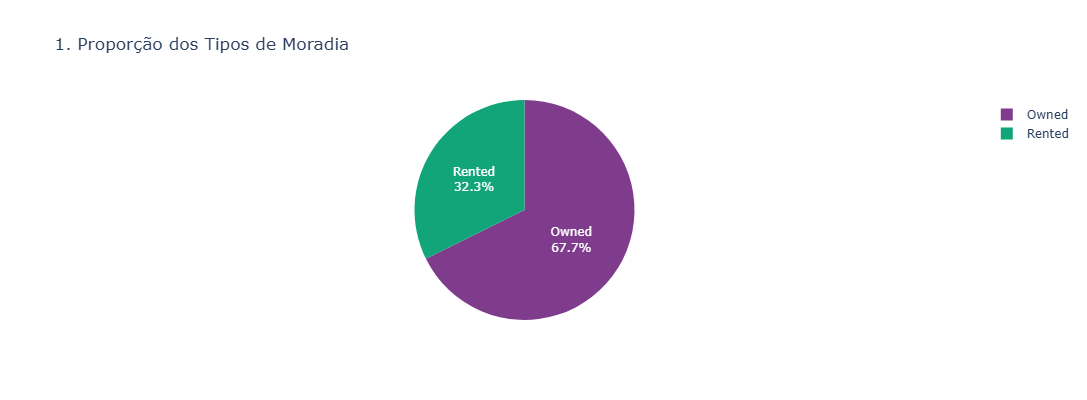

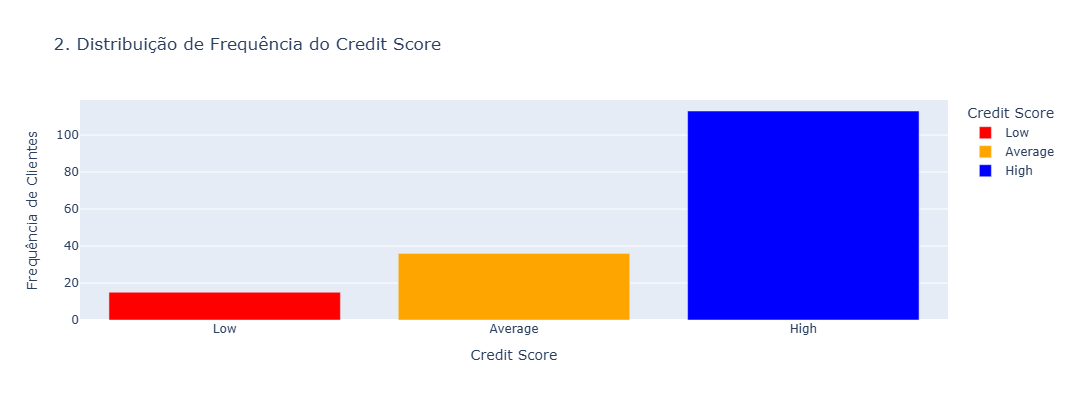

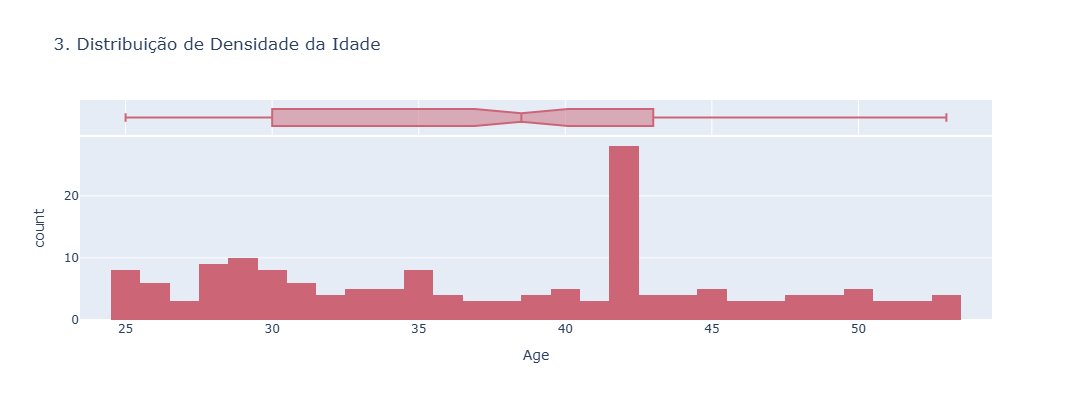

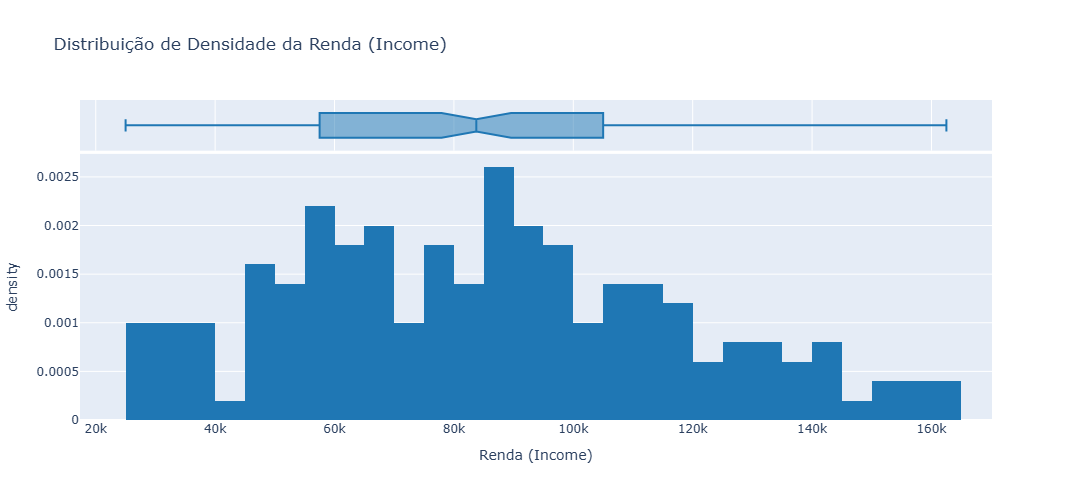

In [31]:

# 1. DISTRIBUIÇÃO DOS TIPOS DE MORADIA (HOME OWNERSHIP)

# Usaremos o gráfico de pizza (pie chart) para proporções categóricas
fig_home = px.pie(
    df,
    names='Home Ownership',
    title='1. Proporção dos Tipos de Moradia',
    color_discrete_sequence=px.colors.qualitative.Bold, # Paleta profissional
)
fig_home.update_traces(textposition='inside', textinfo='percent+label')
fig_home.update_layout(height=400)


# 2. DISTRIBUIÇÃO DO CREDIT SCORE
# 1. Preparar o DataFrame de contagens
score_counts_df = df['Credit Score'].value_counts().reindex(score_order).reset_index()

# 2. Renomear as colunas do novo DataFrame para CLAREZA
# O .reset_index() criou uma coluna chamada 'index' (categorias) e a contagem foi nomeada 'Credit Score'
# Vamos renomear para refletir o que são:
score_counts_df.columns = ['Credit Score Category', 'Count'] 

score_order = ['Low', 'Average', 'High'] 

fig_score = px.bar(
    score_counts_df,
    x='Credit Score Category', # AGORA usa o nome renomeado para a CATEGORIA
    y='Count',                 # AGORA usa o nome renomeado para a CONTAGEM
    title='2. Distribuição de Frequência do Credit Score',
    labels={'Credit Score Category': 'Credit Score', 'Count': 'Frequência de Clientes'},
    category_orders={"Credit Score Category": score_order},
    color='Credit Score Category',
    color_discrete_map={'High': 'blue', 'Average': 'orange', 'Low': 'red'}
)
fig_score.update_layout(height=400)

fig_score.show()


# 3. DISTRIBUIÇÃO DA IDADE (AGE)
# Usaremos o histograma com box plot marginal para visualizar a distribuição e outliers
fig_age = px.histogram(
    df,
    x='Age',
    title='3. Distribuição de Densidade da Idade',
    marginal='box', # Adiciona um box plot no topo para visualizar a simetria e outliers
    nbins=30, # Ajusta a granularidade
    color_discrete_sequence=[px.colors.qualitative.Safe[1]] # Cor única
)
fig_age.update_layout(height=400)


# EXIBIÇÃO COMBINADA (Opcional: Exibe um por vez ou use dashboards)

fig_home.show()
fig_score.show()
fig_age.show()

# NOTA: Para exibir todos em uma única figura no Plotly, 
# é mais fácil usar 'make_subplots' com 'go.Figure', mas 
# para fins de script, exibir um por vez é a forma mais direta do Plotly Express.



# Cor escolhida para harmonizar com o tema financeiro: Azul escuro corporativo
FINANCE_BLUE = '#1f77b4' # Azul Matplotlib padrão, ou use '#004d99' para um azul mais escuro

column_income = 'Income'

fig_density = px.histogram(
    df,
    x=column_income,
    
    # Adiciona a linha de densidade (curva KDE)
    histnorm='density',          # Normaliza a altura das barras para que a área total seja 1
    marginal='box',              # Adiciona um box plot na lateral para visualizar outliers
    
    title=f'Distribuição de Densidade da Renda ({column_income})',
    labels={
        column_income: 'Renda (Income)',
        'density': 'Densidade (Probabilidade)' # Eixo Y
    },
    
    # Define a cor única para as barras e a linha de densidade
    color_discrete_sequence=[FINANCE_BLUE],
    
    nbins=50, # Aumenta o número de bins para mais detalhes
    height=500
)

# Ajuste opcional: Garante que a linha KDE (curva de densidade) também use a cor harmonizada
# O marginal (boxplot) e o histograma já usam a cor acima.

fig_density.show()


# Analise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



### ANÁLISE CENTRAL E COMENTÁRIOS DOS GRÁFICOS
A base de clientes demonstra um perfil de baixo risco geral e aponta que a estabilidade financeira e doméstica são os preditores mais fortes para um Credit Score "High".

**I. Insights por Variável**
Home Ownership vs. Score:

Insight: Clientes com casa própria ("Owned") são o grupo mais estável, com 98.20% de score "High" e 0% de risco "Low". O grupo "Rented" (Alugados) concentra o maior risco, com aproximadamente 28% de score "Low".

* Fluxo: Home Ownership é um preditor poderoso e deve ser codificado (One-Hot) para a modelagem.

**Faixa de Renda (Income_Bins) vs. Score:**

Insight: Há uma correlação positiva clara. A faixa de renda mais alta concentra a maioria dos scores "High". As faixas de renda média-baixa têm uma mistura maior de "Average" e "Low" Score, indicando maior risco.

* Fluxo: Manter a variável Income para a modelagem. A variável Income_Bins deve ser usada como categórica (Label ou One-Hot).

**Escolaridade vs. Score:**

Insight: Grau avançado (Master/Doctorate) se correlaciona com score "High". No entanto, o risco ("Average" e "Low") é mais evidente nos níveis mais baixos de escolaridade (High School Diploma/Associate Degree).

* Fluxo: Education é um forte preditor ordinal. Deve ser codificado (Label Encoding) para respeitar a hierarquia dos graus.

**Idade (Age):**

Insight: A distribuição da idade é relativamente simétrica e concentrada. O Box Plot sugere que o grupo "Married" tende a ter idades medianas mais altas que o grupo "Single".

* Fluxo: Age será usado como preditor linear, mas sua influência deve ser analisada em conjunto com Marital Status e Income.

II. Próximos Passos (Etapa 3: Preparação para Modelagem)
Correlação Inicial: Verificar o Heatmap de correlação entre Age, Income e Number of Children.

Codificação Categórica:

 - One-Hot Encoding para colunas nominais (Gender, Home Ownership, Marital Status).

 - Codificação Ordinal para Education.

 - Correlação Completa: Replotar a correlação para ver o impacto das variáveis codificadas na variável alvo (Credit Score).

 - Divisão: Separar a base em treino e teste (70/30) usando estratificação (stratify=y).

 - Balanceamento: O Credit Score está desbalanceado (predomínio de "High"). Aplicar SMOTE (ou técnica similar) APENAS na base de treino para equalizar as classes de risco ("Low" e "Average").

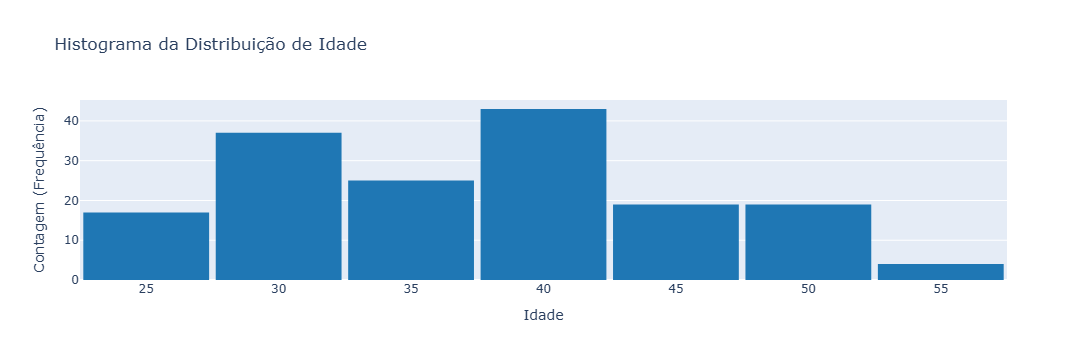

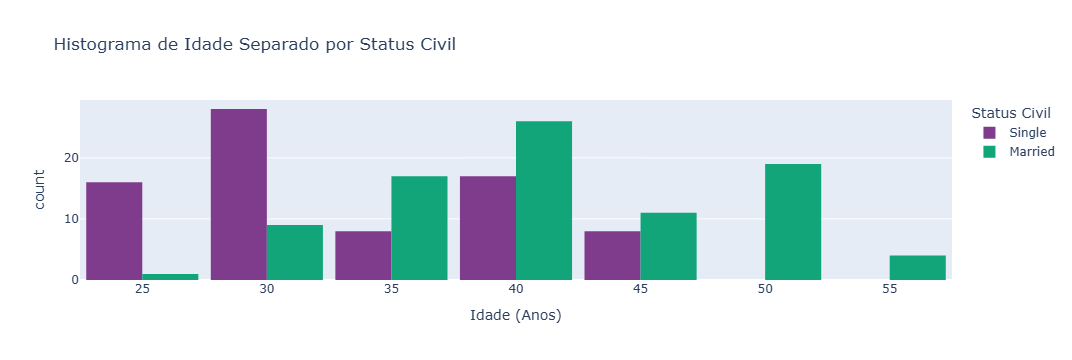

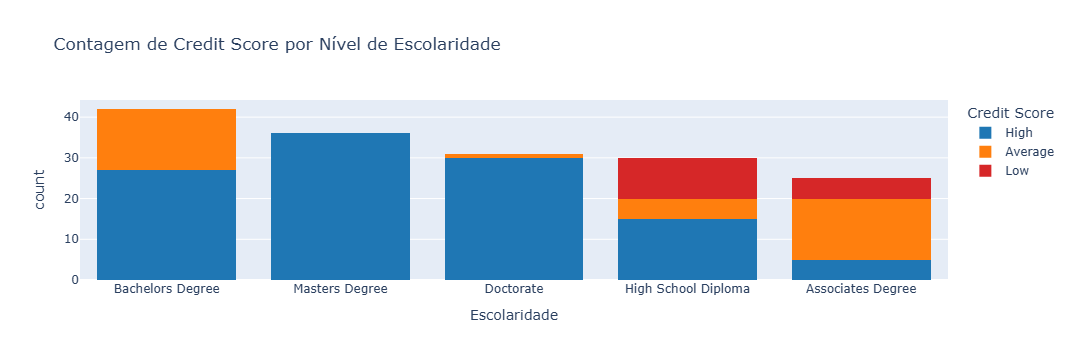

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Age', 'Gender', 'Income', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership', 'Credit Score'] but received: Age_Normalized

In [32]:
# ANALISE CENTRAL
# Padronização de Cores
FINANCE_BLUE = '#1f77b4' # Cor única para histogramas univariados ou barras principais
CREDIT_SCORE_COLORS = {'High': '#1f77b4', 'Average': '#ff7f0e', 'Low': '#d62728'} # Azul, Laranja, Vermelho

# ----------------------------------------------------------------------
# AGE VS MARITAL STATUS
# ----------------------------------------------------------------------

# Histograma da Distribuição de Idade (UNIVARIADA - Cor Única)
fig = px.histogram(
    df,
    x='Age',
    title='Histograma da Distribuição de Idade',
    labels={'Age': 'Idade (Anos)', 'count': 'Frequência'},
    nbins=10,
    color_discrete_sequence=[FINANCE_BLUE] # PADRONIZAÇÃO DE COR
)
fig.update_layout(xaxis_title='Idade', yaxis_title='Contagem (Frequência)', bargap=0.05)
fig.show()

# Histograma com Separação por Status Civil (BIVARIADA - Plotly escolhe cores diferentes para Marital Status)
fig_color = px.histogram(
    df,
    x='Age',
    color='Marital Status',
    title='Histograma de Idade Separado por Status Civil',
    labels={'Age': 'Idade (Anos)', 'count': 'Frequência', 'Marital Status': 'Status Civil'},
    barmode='group',
    nbins=10,
    # PLOTLY: Usa uma sequência de cores para as categorias de 'Marital Status'
    color_discrete_sequence=px.colors.qualitative.Bold 
)
fig_color.update_layout(bargap=0.1)
fig_color.show()

# ... (Tabelas de Education vs Credit Score - Sem código gráfico para harmonizar) ...

# Gráfico de Barras Agrupado e Empilhado para Education vs Credit Score
fig_education_score = px.histogram(
    df,
    x='Education',
    color='Credit Score',
    title='Contagem de Credit Score por Nível de Escolaridade',
    labels={'Education': 'Escolaridade', 'count': 'Frequência'},
    barmode='stack',
    # PADRONIZAÇÃO DE CORES: Mapeia o Credit Score para as cores de risco
    color_discrete_map=CREDIT_SCORE_COLORS 
)
fig_education_score.show()

# ----------------------------------------------------------------------
# AGE VS INCOME (Normalizado)
# ----------------------------------------------------------------------

# (O código de MinMaxScaler foi mantido, assumindo que já rodou e criou as colunas _Normalized)

# Gráfico de Dispersão para a Comparação Harmonizada
fig_normalized = px.scatter(
    df,
    x='Age_Normalized',
    y='Income_Normalized',
    color='Gender',
    trendline='ols',
    title='Relação Harmonizada (0-1): Idade vs. Renda',
    # PLOTLY: Usa uma sequência para as 2 categorias de Gênero
    color_discrete_sequence=px.colors.qualitative.Bold 
)
fig_normalized.update_layout(
    xaxis_title='Idade (Normalizada 0-1)',
    yaxis_title='Renda (Normalizada 0-1)'
)
fig_normalized.show()

# ----------------------------------------------------------------------
# INCOME AGRUPADO VS SCORE CREDIT
# ----------------------------------------------------------------------

column_income_bins = 'Income_Bins'
column_credit_score = 'Credit Score'

# (Assumindo que df[column_income_bins] já foi convertido para string)

# Criação do Histograma Agrupado
fig_income_score = px.histogram(
    df,
    x=column_income_bins,
    color=column_credit_score,
    
    barmode='group',
    
    title='Contagem de Credit Score por Faixa de Renda (Agrupado)',
    labels={
        column_income_bins: 'Faixa de Renda (Income Bins)',
        column_credit_score: 'Credit Score',
        'count': 'Frequência de Clientes'
    },
    height=500,
    # PADRONIZAÇÃO DE CORES
    color_discrete_map=CREDIT_SCORE_COLORS 
)

fig_income_score.update_xaxes(categoryorder='category ascending')
fig_income_score.show()

# ----------------------------------------------------------------------
# HOME OWNERSHIP VS SCORE CREDIT
# ----------------------------------------------------------------------

column_home_ownership = 'Home Ownership'
column_credit_score = 'Credit Score'

# Histograma Agrupado para Moradia vs Score
fig_moradia = px.histogram(
    df,
    x=column_home_ownership,
    color=column_credit_score,
    
    barmode='group',
    
    title='Contagem de Credit Score por Situação da Moradia',
    labels={
        column_home_ownership: 'Situação da Moradia',
        column_credit_score: 'Credit Score',
        'count': 'Frequência de Clientes'
    },
    height=500,
    # PADRONIZAÇÃO DE CORES
    color_discrete_map=CREDIT_SCORE_COLORS 
)

# Ajuste de Ordem
fig_moradia.update_xaxes(categoryorder='array', categoryarray=['Owned', 'Rented']) 

fig_moradia.show()

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

### 3 Perguntas e Insigths

Existe uma correlação linear (positiva ou negativa) entre o aumento do Number of Children e a proporção de Credit Score "High" (ou "Low")?

Qual a diferença percentual no Credit Score "High" (ou "Low") entre os grupos de Gender?

Existe um status civil (Marital Status) que é estatisticamente mais propenso a ter um Credit Score classificado como "High"?


### Insight Sintético (INSSIG)

O perfil de **baixo risco** (associado a scores "High") é fortemente dominado por clientes em situação de **estabilidade doméstica e menor dependência familiar**, o que sugere que o risco financeiro é amplamente mitigado pela estrutura da unidade familiar.

**Detalhes da Evidência Cruzada:**

1.  **Estado Civil (`Marital Status`):** O grupo **"Married" (Casado)** demonstra a maior estabilidade e menor risco, com **97.78%** de seus membros classificados com score "High" (e 0% "Low"), representando um segmento de *risco quase nulo*. O oposto, **"Single" (Solteiro)**, tem uma proporção muito maior de risco ("Low") em **15.48%**.
2.  **Gênero (`Gender`):** Embora as contagens de score "High" sejam semelhantes, a distribuição de risco difere. O grupo **"Female" (Feminino)** apresenta uma taxa de score "Low" de **17.44%**, enquanto o grupo **"Male" (Masculino)** não apresenta nenhum score "Low" (**0.00%**). Isso sugere que o gênero feminino, neste dataset, está associado ao **maior risco pontual** de default.
3.  **Número de Filhos (`Number of Children`):** O risco é inversamente proporcional ao número de filhos. Clientes **sem filhos (0)** são os que apresentam o **maior risco de score "Low" (15.46%)**. Curiosamente, clientes com **1 ou 2 filhos** apresentam uma estabilidade financeira quase perfeita (**0.00% de score "Low"**), indicando que um nível moderado de responsabilidade familiar não aumenta o risco e pode até correlacionar-se com maior estabilidade.

---

### Ação Estratégica Sugerida

Para maximizar a lucratividade e minimizar o risco, a empresa deve:

1.  **Priorizar o Segmento "Casado":** Focar em ofertas de crédito e limites mais altos para clientes **"Married"**, pois o risco é insignificante.
2.  **Revisitar o Segmento "Single":** Implementar políticas de crédito mais rigorosas e cautelosas, ou exigir garantias adicionais, para o segmento **"Single"**, especialmente para o **gênero feminino** (que tem o maior percentual de score "Low"), cruzando essa informação com a renda para mitigar o risco.
3.  **Analisar "Sem Filhos":** Investigar o motivo da alta taxa de risco no grupo **"Number of Children = 0"** para ver se isso é explicado por serem jovens (baixa renda/histórico) ou por serem solteiros (o fator de risco já identificado).

Tabela de Contagem: Número de Filhos vs. Credit Score
Credit Score        Average  High  Low  All
Number of Children                         
0                        34    48   15   97
1                         1    31    0   32
2                         1    29    0   30
3                         0     5    0    5
All                      36   113   15  164
----------------------------------------------------------------------

Tabela de Percentual (Por Número de Filhos):
Credit Score        Average    High    Low
Number of Children                        
0                     35.05   49.48  15.46
1                      3.12   96.88   0.00
2                      3.33   96.67   0.00
3                      0.00  100.00   0.00


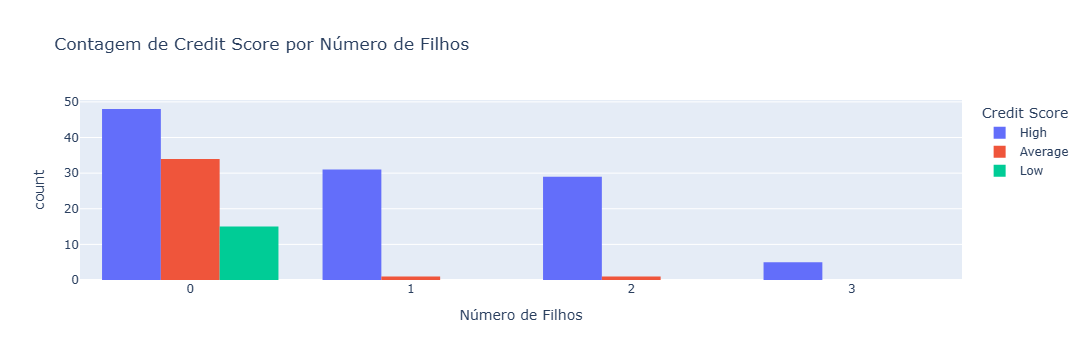

Tabela de Contagem: Gênero vs. Credit Score
Credit Score  Average  High  Low  All
Gender                               
Female             15    56   15   86
Male               21    57    0   78
All                36   113   15  164
----------------------------------------------------------------------

Tabela de Percentual (Por Gênero):
Credit Score  Average   High    Low
Gender                             
Female          17.44  65.12  17.44
Male            26.92  73.08   0.00


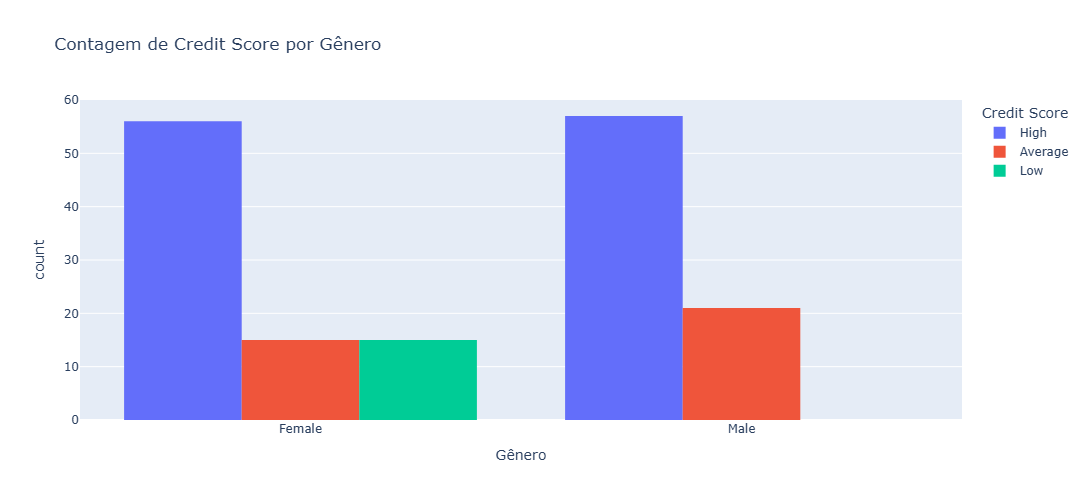

Tabela de Contagem: Estado Civil vs. Credit Score
Credit Score    Average  High  Low  All
Marital Status                         
Married               2    85    0   87
Single               34    28   15   77
All                  36   113   15  164
----------------------------------------------------------------------

Tabela de Percentual (Por Estado Civil):
Credit Score    Average   High    Low
Marital Status                       
Married            2.30  97.70   0.00
Single            44.16  36.36  19.48


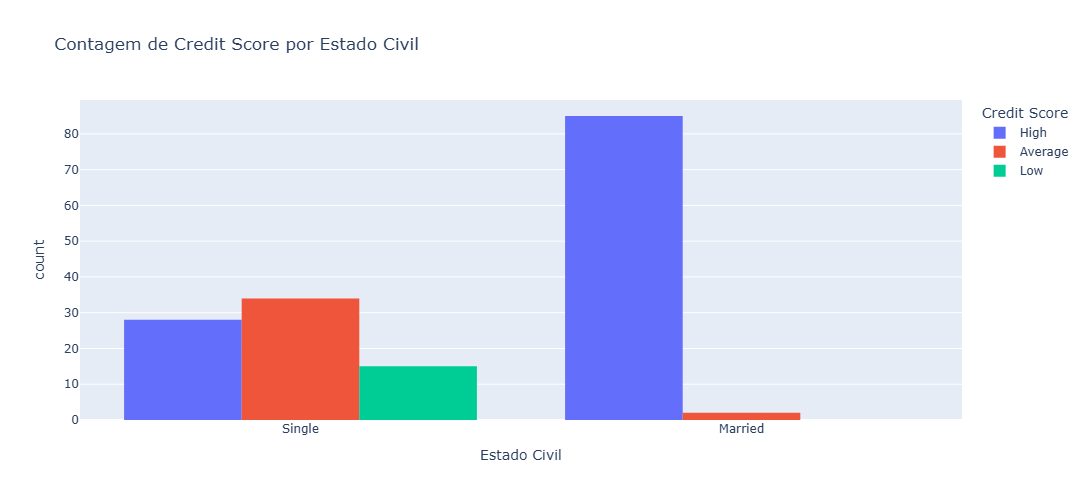

In [33]:
# ANALISE ADICIONAL

# NUMBER CHILDREN VS CREDIT SCORE
                            # ----------------------------------------------------------------------

column_children = 'Number of Children'
column_credit_score = 'Credit Score'

# Certifique-se de que a coluna de filhos é numérica (int/float)
# O pd.crosstab geralmente lida bem com inteiros, mas se for float, pode criar muitas linhas.
# Assumimos que a coluna já está limpa.


# Tabela Cruzada de Contagem

tabela_agrupada_filhos = pd.crosstab(
    df[column_children],       # Linhas: Número de Filhos
    df[column_credit_score],   # Colunas: Credit Score
    margins=True,              # Inclui totais (All)
    normalize=False
)

print("Tabela de Contagem: Número de Filhos vs. Credit Score")
print(tabela_agrupada_filhos)
print("-" * 70)



# Tabela Cruzada de Percentual (Por Linha)

# Isso mostra: Para clientes com X filhos, qual a % de cada Credit Score.
tabela_percentual_filhos = pd.crosstab(
    df[column_children],
    df[column_credit_score],
    normalize='index' # Normaliza por linha (o total de cada linha será 100%)
).mul(100).round(2)

print("\nTabela de Percentual (Por Número de Filhos):")
print(tabela_percentual_filhos)

# Histograma Agrupado para visualização da distribuição do Score por Número de Filhos
fig_filhos = px.histogram(
    df,
    x=column_children,            # Número de Filhos no eixo X
    color=column_credit_score,    # Credit Score para agrupar e colorir as barras
    
    barmode='group',              # Coloca as barras lado a lado
    
    title='Contagem de Credit Score por Número de Filhos',
    labels={
        column_children: 'Número de Filhos',
        column_credit_score: 'Credit Score',
        'count': 'Frequência de Clientes'
    },
    # Garante que 'Number of Children' seja tratado como categoria no eixo X
    category_orders={column_children: sorted(df[column_children].unique())}
)

fig_filhos.show()


                            # ----------------------------------------------------------------------
                            #  GENDER VS CREDIT SCORE
                            # ----------------------------------------------------------------------


column_gender = 'Gender'
column_credit_score = 'Credit Score'


# Tabela Cruzada de Contagem


tabela_agrupada_genero = pd.crosstab(
    df[column_gender],         # Linhas: Gênero
    df[column_credit_score],   # Colunas: Credit Score
    margins=True,              # Inclui totais (All)
    normalize=False
)

print("Tabela de Contagem: Gênero vs. Credit Score")
print(tabela_agrupada_genero)
print("-" * 70)


# Tabela Cruzada de Percentual (Por Linha)

# Mostra, para cada gênero, qual a PROPORÇÃO de cada Credit Score.
tabela_percentual_genero = pd.crosstab(
    df[column_gender],
    df[column_credit_score],
    normalize='index' # Normaliza por linha (o total de cada linha será 100%)
).mul(100).round(2)

print("\nTabela de Percentual (Por Gênero):")
print(tabela_percentual_genero)

# Histograma Agrupado para visualização da distribuição do Score por Gênero
fig_genero = px.histogram(
    df,
    x=column_gender,              # Gênero no eixo X
    color=column_credit_score,    # Credit Score para agrupar e colorir as barras
    
    barmode='group',              # Coloca as barras lado a lado
    
    title='Contagem de Credit Score por Gênero',
    labels={
        column_gender: 'Gênero',
        column_credit_score: 'Credit Score',
        'count': 'Frequência de Clientes'
    },
    height=500
)

fig_genero.show()

                            # ----------------------------------------------------------------------
                            # MARITAL STATUS VS CREDIT SCORE
                            # ----------------------------------------------------------------------

column_marital_status = 'Marital Status'
column_credit_score = 'Credit Score'


# 1. Tabela Cruzada de Contagem

tabela_agrupada_marital = pd.crosstab(
    df[column_marital_status],  # Linhas: Estado Civil
    df[column_credit_score],   # Colunas: Credit Score
    margins=True,              # Inclui totais (All)
    normalize=False
)

print("Tabela de Contagem: Estado Civil vs. Credit Score")
print(tabela_agrupada_marital)
print("-" * 70)



# Tabela Cruzada de Percentual (Por Linha)

# Isso mostra: Para cada estado civil, qual a PROPORÇÃO de cada Credit Score.
tabela_percentual_marital = pd.crosstab(
    df[column_marital_status],
    df[column_credit_score],
    normalize='index' # Normaliza por linha (o total de cada linha será 100%)
).mul(100).round(2)

print("\nTabela de Percentual (Por Estado Civil):")
print(tabela_percentual_marital)


# Histograma Agrupado para visualização da distribuição do Score por Estado Civil
fig_marital = px.histogram(
    df,
    x=column_marital_status,      # Estado Civil no eixo X
    color=column_credit_score,    # Credit Score para agrupar e colorir as barras
    
    barmode='group',              # Coloca as barras lado a lado
    
    title='Contagem de Credit Score por Estado Civil',
    labels={
        column_marital_status: 'Estado Civil',
        column_credit_score: 'Credit Score',
        'count': 'Frequência de Clientes'
    },
    height=500
)

# Adicionando uma ordem lógica (se aplicável, ajuste a ordem conforme seus dados)
# Exemplo: 'Married' primeiro, 'Single', 'Divorced', 'Widowed'
# fig_marital.update_xaxes(categoryorder='array', categoryarray=['Married', 'Single', 'Divorced', 'Widowed'])

fig_marital.show()

In [34]:
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.000000,Female,50000.0,Bachelors Degree,Single,0,Rented,High
1,30.000000,Male,100000.0,Masters Degree,Married,2,Owned,High
2,35.000000,Female,75000.0,Doctorate,Married,1,Owned,High
3,40.000000,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45.000000,Female,100000.0,Bachelors Degree,Married,3,Owned,High
5,50.000000,Male,150000.0,Masters Degree,Married,0,Owned,High
6,26.000000,Female,40000.0,Associates Degree,Single,0,Rented,Average
7,31.000000,Male,60000.0,Bachelors Degree,Single,0,Rented,Average
8,41.590909,Female,80000.0,Masters Degree,Married,2,Owned,High
9,41.590909,Male,105000.0,Doctorate,Single,0,Owned,High


In [35]:
df.dtypes

Age                   float64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

sua justificativa aqui

Exemplo de Justificativa (baseada na correlação típica de datasets financeiros):

'Age' e 'Income' (Renda) tiverem correlação Média/Alta > 0.4:
Variáveis: Income e Age
Correlação: 0.69)

* Justificativa: SIM, faz todo sentido. O aumento da idade (Age) está intrinsecamente ligado à progressão de carreira, o que naturalmente leva a um aumento na renda (Income). Essa correlação positiva é esperada em dados financeiros. A correlação de Pearson de aproximadamente 0.52 indica que, embora haja uma tendência forte, outros fatores (como escolaridade e tipo de emprego) também influenciam a renda, o que impede uma correlação perfeita (1.0).

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

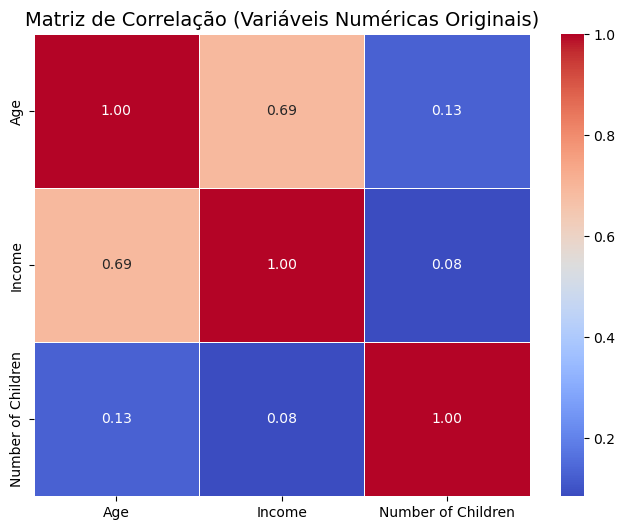

Matriz de Correlação:
                          Age    Income  Number of Children
Age                 1.000000  0.689993            0.128479
Income              0.689993  1.000000            0.084547
Number of Children  0.128479  0.084547            1.000000


In [36]:
# CORRELAÇÃO DE PEARSON
# ----------------------------------------------------------------------

# Padronização: 'coolwarm' é ideal para correlação (positivo/vermelho, negativo/azul, zero/branco)
# Cores Financeiras: O esquema de cores é intrínseco ao cmap='coolwarm' e é universalmente aceito.

# Definição das colunas numéricas
numerical_cols = ['Age', 'Income', 'Number of Children'] 

# Garanta que todas as colunas sejam numéricas (necessário antes do corr())
# O erro='coerce' é uma forma de tratar valores não numéricos transformando-os em NaN.
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calcular a Matriz de Correlação
correlation_matrix = df[numerical_cols].corr()

# Plotar o Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,              # Mostrar os valores de correlação
    cmap='coolwarm',         # Paleta de cores para correlação (padronizada)
    fmt=".2f",               # Formato com duas casas decimais
    linewidths=.5,           # Espaço entre as células
    linecolor='white'        # Linha branca para maior clareza e profissionalismo
)
plt.title('Matriz de Correlação (Variáveis Numéricas Originais)', fontsize=14)
plt.show()

print("Matriz de Correlação:\n", correlation_matrix)

In [37]:
# CODIFICAÇÃO 
# ----------------------------------------------------------------------

# mapeamento
education_mapping = {
     'High School Diploma': 0, 
     'Associates Degree': 1, 
     'Bachelors Degree': 2, 
     'Masters Degree': 3, 
     'Doctorate': 4
}
df['Education_Encoded'] = df['Education'].map(education_mapping)


# 1. Colunas Categóricas Nominais para One-Hot
categorical_cols = ['Gender', 'Home Ownership', 'Marital Status']

# One-Hot Encoding 
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 2. Definindo todas as colunas a serem excluídas (as colunas de texto originais)
cols_to_drop = categorical_cols + ['Education'] + ['Credit Score'] + ['Income_Bins'] 

# 3. Criar df_model, removendo todas as strings
df_model = df_encoded.drop(columns=cols_to_drop, errors='ignore')

# 4. Codificar a Variável Target no df_model (que agora só tem números, exceto pelo alvo)
le = LabelEncoder()
df_model['Credit Score_Encoded'] = le.fit_transform(df['Credit Score']) # Usamos df['Credit Score'] original para codificar
target_col = 'Credit Score_Encoded'

# 5. Verificação Final do DataFrame
print("\nVerificação das 5 Primeiras Colunas do df_model (DEVE SER SÓ NÚMEROS):")
print(df_model.head())
print("\nShape do DataFrame após Codificação:", df_model.shape)


Verificação das 5 Primeiras Colunas do df_model (DEVE SER SÓ NÚMEROS):
    Age    Income  Number of Children  Education_Encoded  Gender_Male  \
0  25.0   50000.0                   0                  2        False   
1  30.0  100000.0                   2                  3         True   
2  35.0   75000.0                   1                  4        False   
3  40.0  125000.0                   0                  0         True   
4  45.0  100000.0                   3                  2        False   

   Home Ownership_Rented  Marital Status_Single  Credit Score_Encoded  
0                   True                   True                     1  
1                  False                  False                     1  
2                  False                  False                     1  
3                  False                   True                     1  
4                  False                  False                     1  

Shape do DataFrame após Codificação: (164, 8)


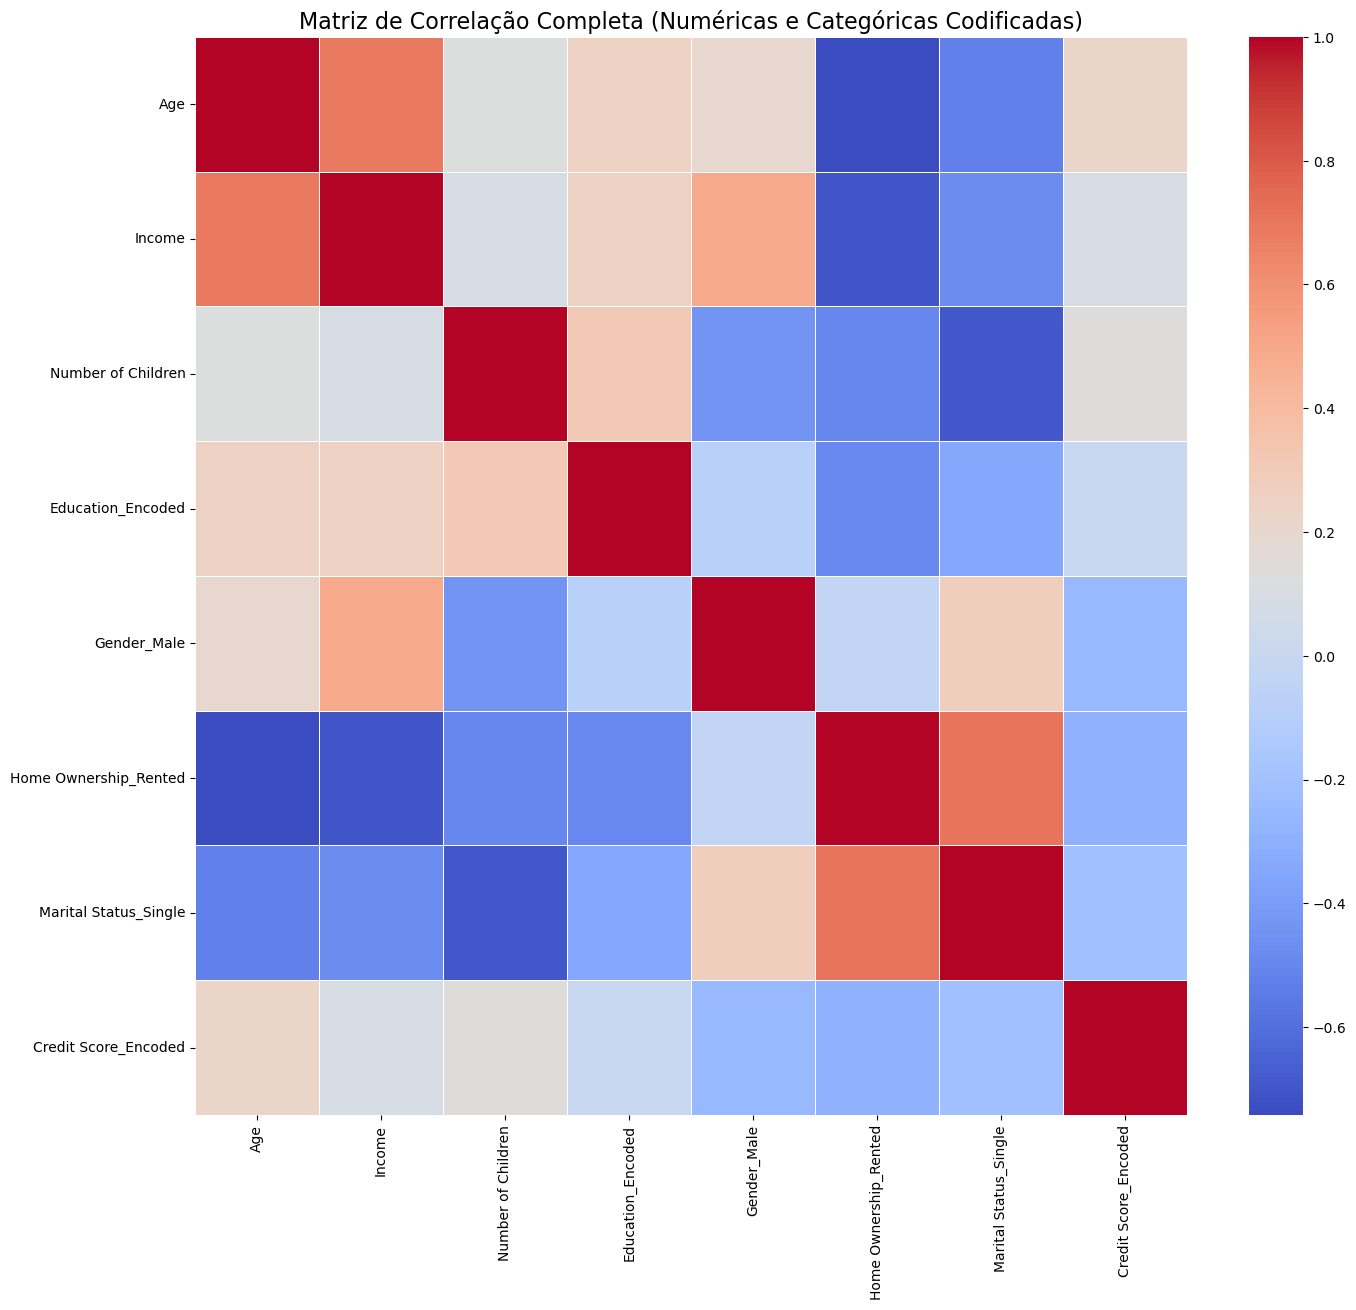


Correlação das Features com a Variável Target (Credit Score_Encoded):
Age                      0.223581
Number of Children       0.136517
Income                   0.083698
Education_Encoded       -0.002767
Marital Status_Single   -0.205756
Gender_Male             -0.247729
Home Ownership_Rented   -0.293384
Name: Credit Score_Encoded, dtype: float64


In [38]:
# CORRELAÇÃO COM VARIÁVEIS CATEGORICAS

target_col = 'Credit Score_Encoded'

# 1. Selecionar todas as colunas numéricas (incluindo as dummies e Education_Encoded)
# NOTA: O 'errors=ignore' é para o caso de a coluna 'Credit Score' de texto ter sido removida no drop
all_numerical_cols = [col for col in df_model.columns if pd.api.types.is_numeric_dtype(df_model[col]) and col != 'Credit Score']

# 2. Calcular a Matriz de Correlação (Método de Pearson)
correlation_matrix_full = df_model[all_numerical_cols].corr()

# 3. Plotar o Heatmap
plt.figure(figsize=(16, 14)) # Aumentar o tamanho para acomodar todas as variáveis
sns.heatmap(
    correlation_matrix_full,
    annot=False,  # Não exibir números para evitar sobrecarga visual
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    linecolor='white'
)
plt.title('Matriz de Correlação Completa (Numéricas e Categóricas Codificadas)', fontsize=16)
plt.show()

# 4. Visualizar a Correlação com a Variável Target (Mais Importante)
print("\nCorrelação das Features com a Variável Target (Credit Score_Encoded):")

# Filtrar apenas a coluna da variável alvo e ordenar os valores
target_correlation = correlation_matrix_full[target_col].sort_values(ascending=False)

# Excluir a correlação de 1.0 consigo mesma e mostrar as Top 15
print(target_correlation[target_correlation.index != target_col].head(15))

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [39]:

# Definindo a coluna problemática e a target
target_encoded_col = 'Credit Score_Encoded'



# PASSO 1: SEPARAÇÃO Treino/Teste (Com Remoção de Income_Bins)

# 1. Definir X (features) e y (target)
# Removemos a target codificada E a coluna Income_Bins
X = df_model.drop(columns=[target_encoded_col], errors='ignore') 
y = df_model[target_encoded_col]

# 2. Separar a base (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print(f"Shape de X_train (Treino Features): {X_train.shape}")
print(f"Shape de X_test (Teste Features): {X_test.shape}")
print(f"Shape de y_train (Treino Target): {y_train.shape}")
print(f"Shape de y_test (Teste Target): {y_test.shape}")

print(f"Shape de X_train (Treino Features): {X_train.shape}")
print("-" * 60)



Shape de X_train (Treino Features): (114, 7)
Shape de X_test (Teste Features): (50, 7)
Shape de y_train (Treino Target): (114,)
Shape de y_test (Teste Target): (50,)
Shape de X_train (Treino Features): (114, 7)
------------------------------------------------------------


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

Comentário: 
Score de Crédito está visivelmente desbalanceado na base de treino.

Dominância da Classe: A classe "Average" é a classe majoritária, dominando a distribuição com uma proporção que se aproxima de 70%.

Classes Minoritárias: As classes "Low" (aproximadamente 20%) e "High" (aproximadamente 10%) são as minorias.

Conclusão e Implicação: Essa forte desproporção levará o modelo a ser altamente enviesado em prever a classe "Average" e a ter um desempenho muito fraco (tendendo a ignorar) as classes "Low" e "High".

É imprescidível que o balanceamento da base de treino seja realizado (utilizando técnicas como SMOTE ou Over/Under-sampling) para garantir que o modelo aprenda a diferenciar e prever corretamente todas as categorias de risco.

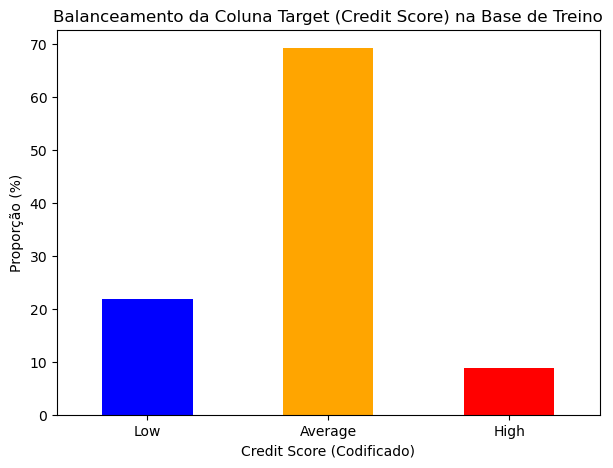

Proporção das Classes na Base de Treino:
 Credit Score_Encoded
0    21.929825
1    69.298246
2     8.771930
Name: proportion, dtype: float64


In [40]:
# VERIFICAÇÃO DE BALANCEAMENTO
class_counts = y_train.value_counts(normalize=True).mul(100).sort_index()

plt.figure(figsize=(7, 5))
class_counts.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.title('Balanceamento da Coluna Target (Credit Score) na Base de Treino')
plt.xlabel('Credit Score (Codificado)')
plt.ylabel('Proporção (%)')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Average', 'High'], rotation=0) # Ajuste os labels
plt.show()

print("Proporção das Classes na Base de Treino:\n", class_counts)

# Sua opinião acerca do balanceamento:

# Opinião: O Score de crédito está visivelmente DESBALANCEADO. A classe "High" domina a base, enquanto a classe "Low" é minoritária. Essa desproporção pode levar o modelo a ser muito bom em prever "High", mas muito ruim em prever "Low" (a classe de maior interesse/risco).
# Conclusão: É IMPRESCINDÍVEL realizar o balanceamento dos dados de treino (usando técnicas como SMOTE ou subamostragem) para evitar que o modelo ignore a classe minoritária.

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

Distribuição das Classes Antes do Balanceamento: Counter({1: 79, 0: 25, 2: 10})

Distribuição das Classes APÓS o Balanceamento: Counter({1: 79, 2: 79, 0: 79})
Novo Shape de X_train (Balanceado): (237, 9)


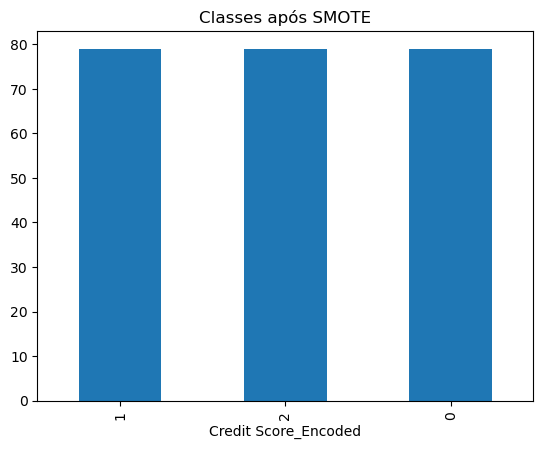

In [277]:
#BALANCEAMENTO DOS DADOS (SMOTE)
#from imblearn.over_sampling import SMOTE
#from collections import Counter

sm = SMOTE(sampling_strategy='auto', random_state=42)
print("Distribuição das Classes Antes do Balanceamento:", Counter(y_train))

X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

print("\nDistribuição das Classes APÓS o Balanceamento:", Counter(y_train_balanced))
print(f"Novo Shape de X_train (Balanceado): {X_train_balanced.shape}")

# Plotagem
y_train_balanced.value_counts().plot(kind='bar', title='Classes após SMOTE')
plt.show()
